CLIMATE ANALYSIS AND EXPLORATION

In [1]:
#Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect


In [2]:
#Create engine 
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#Declare Base using automap_base()
Base = automap_base()

##############
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [3]:
 # Save references to each table
 Measurement =  Base.classes.measurement
 Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
#Determine what attributes are in the class
###Use inspector to get 'measurement' attributes, 'station' attributes
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [6]:
#Load Measurement and Station into panda dataframes
stmt = session.query(Measurement).statement
Measurement_df = pd.read_sql_query(stmt, session.bind)
print("Measurement_df")
print(Measurement_df.head())

stmt = session.query(Station).statement
Station_df = pd.read_sql_query(stmt, session.bind)
print("Station_df")
print(Station_df.head())
Measurement_df.dtypes


Measurement_df
   id      station        date  prcp  tobs
0   1  USC00519397  2010-01-01  0.08  65.0
1   2  USC00519397  2010-01-02  0.00  63.0
2   3  USC00519397  2010-01-03  0.00  74.0
3   4  USC00519397  2010-01-04  0.00  76.0
4   5  USC00519397  2010-01-06   NaN  73.0
Station_df
   id      station                                    name  latitude  \
0   1  USC00519397                    WAIKIKI 717.2, HI US   21.2716   
1   2  USC00513117                    KANEOHE 838.1, HI US   21.4234   
2   3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213   
3   4  USC00517948                       PEARL CITY, HI US   21.3934   
4   5  USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992   

   longitude  elevation  
0  -157.8168        3.0  
1  -157.8015       14.6  
2  -157.8374        7.0  
3  -157.9751       11.9  
4  -158.0111      306.6  


id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

Precipitation Analysis

In [7]:
# # Design a QUERY to retrieve the last 12 months of precipitation data and plot the results

# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#print(latest_date)    # latest_date = '2017-08-23'

# Query for 1 yr ago from the latest_date
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


# Start date for data is to include the 2016-08-23. 
# Hence date should be > 2016-08-22 to include the the 23rd. To attain this, '-1' in the annual_start_date variable.
# annual_start_date = dt.datetime(2016, 8, 23 - 1)

Measurement_yr = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date).\
    all()

# Measurement_yr  

Measurement_yr_df = pd.DataFrame(Measurement_yr[:], columns=['date', 'prcp'])
print(Measurement_yr_df)
# stmt = session.query(Measurement.date, Measurement.prcp).statement.\
#     filter(Measurement.date >= query_date).\
#     limit(10)

Measurement_yr_df.info()

Query Date:  2016-08-23
            date  prcp
0     2016-08-23  0.00
1     2016-08-23  0.15
2     2016-08-23  0.05
3     2016-08-23   NaN
4     2016-08-23  0.02
...          ...   ...
2225  2017-08-22  0.50
2226  2017-08-23  0.00
2227  2017-08-23  0.00
2228  2017-08-23  0.08
2229  2017-08-23  0.45

[2230 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2230 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [8]:
# Load the query results into a Pandas DataFrame and set the index to the date column.

##### Convert to column 'date' from format 'object' to 'datetime' 
Measurement_yr_df["date"]=pd.to_datetime(Measurement_yr_df["date"],format="%Y/%m/%d")
#Measurement_yr_df.info()  #Check dtype has converted from 'object' to 'datetime'
print(Measurement_yr_df.info())

##### Sort the DataFrame values by date.

# Set the index to the date column
Measurement_yr_df = Measurement_yr_df.set_index("date")
Measurement_yr_df

# Sort the dataframe by date
Measurement_yr_df = Measurement_yr_df.sort_values(by="date")
Measurement_yr_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2230 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.0 KB
None


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [9]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results


########################
#METHOD Importing the full table directly
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.

    # conn=engine.connect()
    # Measurement_yr_df = pd.read_sql("SELECT * FROM Measurement" , conn)
    # Measurement_yr_df

    # ##### Convert to column 'date' from format 'object' to 'datetime' 
    # Measurement_yr_df["date"]=pd.to_datetime(Measurement_yr_df["date"],format="%Y/%m/%d")
    # #Measurement_yr_df.info()  #Check dtype has converted from 'object' to 'datetime'
    # print(Measurement_yr_df.info())

    # ##### Calculate the date 1 year ago from the last data point in the database
    # #Check most recent date that data provides
    # Measurement_yr_df["date"].max()   #It is 2017-08-23

    # older_date = "2016-08-23"
    # latest_date = "2017-08-23"

    # Measurement_yr_df = Measurement_yr_df.loc[Measurement_yr_df["date"].between(older_date, latest_date)]
    # Measurement_yr_df

    # # Perform a query to retrieve the data and precipitation scores
    # ########I didn't do this via query for this step####
    # Measurement_yr_df

    # # Save the query results as a Pandas DataFrame and set the index to the date column
    # Measurement_yr_df = Measurement_yr_df.set_index("date")
    # Measurement_yr_df

    # # Sort the dataframe by date
    # Measurement_yr_df = Measurement_yr_df.sort_values(by="date")
    # Measurement_yr_df


Text(0, 0.5, 'Precipitation (inches)')

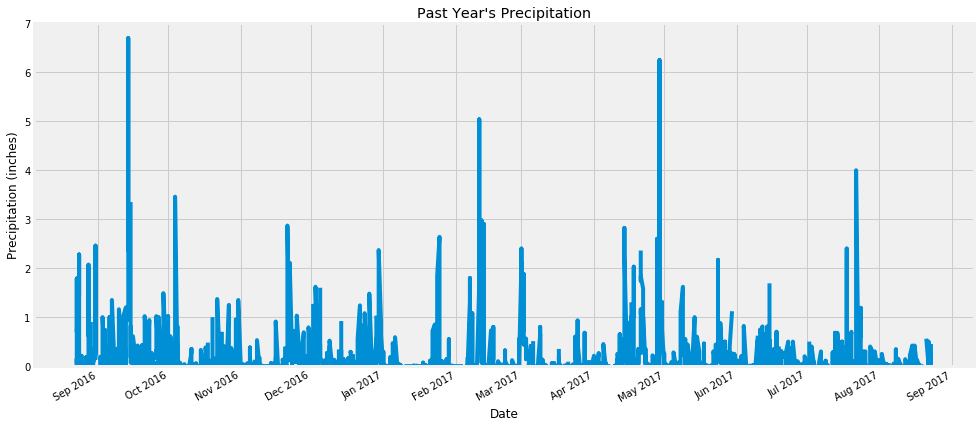

In [10]:
# Use Pandas Plotting with Matplotlib to plot the data
# Measurement_yr_df.plot(kind="bar", figsize=(7,4), y="prcp", linewidth=10, rot=90, color="plum", legend=False);

# plt.title("Past Year's Precipitation")
# plt.xlabel("date")
# plt.ylabel("Precipitation (inches)")

##############
#plot data

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,7))
Measurement_yr_df.plot(ax=ax)

#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.ylim(0,7)
ax.get_legend().remove()

#Headings
plt.title("Past Year's Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_summary=Measurement_yr_df["prcp"].describe()
prcp_summary

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [12]:
Measurement_df['station'].unique()
Measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


Stations Analysis

In [30]:
# Design a query to show the total number of stations which are available in this dataset? ('Measurements' dataset)

#Dependencies
from sqlalchemy import distinct

# # Count distinct "name" values
# num_stations=session.query(func.count(distinct(Measurement.station))).first()
# print(f"Total Number of Stations: {num_stations}")

num_stations = session.query(func.count(distinct(Measurement.station))).all()
print(f"Total Number of Stations: {num_stations}")

distinct_stations = session.query(distinct(Measurement.station)).all()
print(f"Distinct Stations\n{distinct_stations}")

# session.query(Invoices.BillingPostalCode, func.sum(Items.UnitPrice * Items.Quantity)).\
#     filter(Invoices.InvoiceId == Items.InvoiceId).\
#     filter(Invoices.BillingCountry == 'Germany').\
#     group_by(Invoices.BillingPostalCode).\
#     order_by(func.sum(Items.UnitPrice * Items.Quantity).desc()).all()



# print(f"Distinct Stations\n{num_stations}")

# # List the unique stations
# records = engine.execute("SELECT DISTINCT (station) FROM Measurement")
# print("\nDistinct Stations")
# for record in records:
#     print(f"\n{record}")


Total Number of Stations: [(9,)]
Distinct Stations
[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

    # Return count of "station id" grouped by "station"
    # station_id_group=session.query(Measurement.station, func.count(Measurement.station)).\
    #     group_by(Measurement.station).\
    #     order_by(desc("station_records"))

    # for record in station_id_group:
    #     print(f"\n{record}")

station_id_group = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_id_group

# session.query(Invoices.BillingPostalCode, func.sum(Items.UnitPrice * Items.Quantity)).\
#     filter(Invoices.InvoiceId == Items.InvoiceId).\
#     filter(Invoices.BillingCountry == 'Germany').\
#     group_by(Invoices.BillingPostalCode).\
#     order_by(func.sum(Items.UnitPrice * Items.Quantity).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the 
# lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?

# In the dataframe Measurement_df, there is a column titled 'tobs'     
# tobs: temperature observation data

# Most active station id = 'USC00519281' (determined from query from above cell)

#FOR Station id = 'USC00519281',
    # The lowest temp (F) is: 
lowest_temp = session.query(Measurement.station,func.min(Measurement.tobs)).\
      filter(Measurement.station == 'USC00519281').all()
print(f"Lowest Temp (F) for most active station: {lowest_temp}")

    # The lowest temp (F) is: 
highest_temp = session.query(Measurement.station,func.max(Measurement.tobs)).\
      filter(Measurement.station == 'USC00519281').all()
print(f"\nHighest Temp (F) for most active station: {highest_temp}")

    # The average temp (F) is: 
avg_temp = session.query(Measurement.station,func.avg(Measurement.tobs)).\
      filter(Measurement.station == 'USC00519281').all()
print(f"\nAverage Temp (F) for most active station: {avg_temp}")

# low = session.query(Measurement.station, func.count(Measurement.station)).\
#     group_by(Measurement.station).\
#     order_by(func.count(Measurement.station).desc()).all()


#     session.query(Invoices.BillingPostalCode, func.sum(Items.UnitPrice * Items.Quantity)).\
#     filter(Invoices.InvoiceId == Items.InvoiceId).\
#     filter(Invoices.BillingCountry == 'Germany').\
#     group_by(Invoices.BillingPostalCode).\
#     order_by(func.sum(Items.UnitPrice * Items.Quantity).desc()).all()

#  (
#             session.query(mps)  .filter_by(idc = int(c.idc))
#                                 .filter_by(idmp = int(m.idmp))
#                                 .group_by(func.day(mps.tschecked))
#         ).all()



Lowest Temp (F) for most active station: [('USC00519281', 54.0)]

Highest Temp (F) for most active station: [('USC00519281', 85.0)]

Average Temp (F) for most active station: [('USC00519281', 71.66378066378067)]


In [16]:
session.query(Measurement)

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_max_TOBS = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

print(f"Station with highest number of TOBS: {station_max_TOBS}")

#Station with highest number of TOBS (Temperature Observations): 'USC00519281'

#FOR station 'USC00519281' and only for data in latest year, query for a list which includes x-axis: Temps, y-axis: Frequency. 
print("Query Date: ", query_date) #From 2016-08-23 (Query Date) to 2017-08-23

freq_of_temps = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= query_date).\
    order_by((Measurement.tobs).asc()).all()

freq_of_temps

# group_by(Measurement.tobs).\


# Load the results into a pandas dataframe 
freq_of_temps_df = pd.DataFrame(freq_of_temps[:], columns = ["station","temp"])
freq_of_temps_df



# df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
# df.set_index('emoji_id', inplace=True, )
# df.head(10)


Station with highest number of TOBS: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
Query Date:  2016-08-23


,station,temp
0,USC00519281,59.0
1,USC00519281,59.0
2,USC00519281,59.0
3,USC00519281,60.0
4,USC00519281,60.0
...,...,...
347,USC00519281,81.0
348,USC00519281,82.0
349,USC00519281,82.0
350,USC00519281,82.0


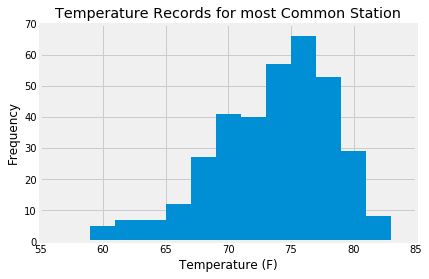

In [29]:
########### HISTOGRAM ##############

freq_of_temps_graph=freq_of_temps_df.hist(column="temp", bins=12)
freq_of_temps_graph

# Set a title for the chart
plt.title("Temperature Records for most Common Station")
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")

#Set x-axis and y-axis range
plt.xlim(55,85)
plt.ylim(0,70)

#Save figure
plt.savefig("Freq_of_temps.png",bbox_inches="tight")
plt.show()